In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz

In [2]:
plt.rcParams['figure.dpi'] = 250 
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
#create butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
#read data
df = pd.read_csv('fossil1.csv')

In [5]:
#sampling rate(Hz)
fs = 50.0

#low cut frequency(Hz)
lowcut = 10

#high cut frequency(Hz)
highcut = 24.8 

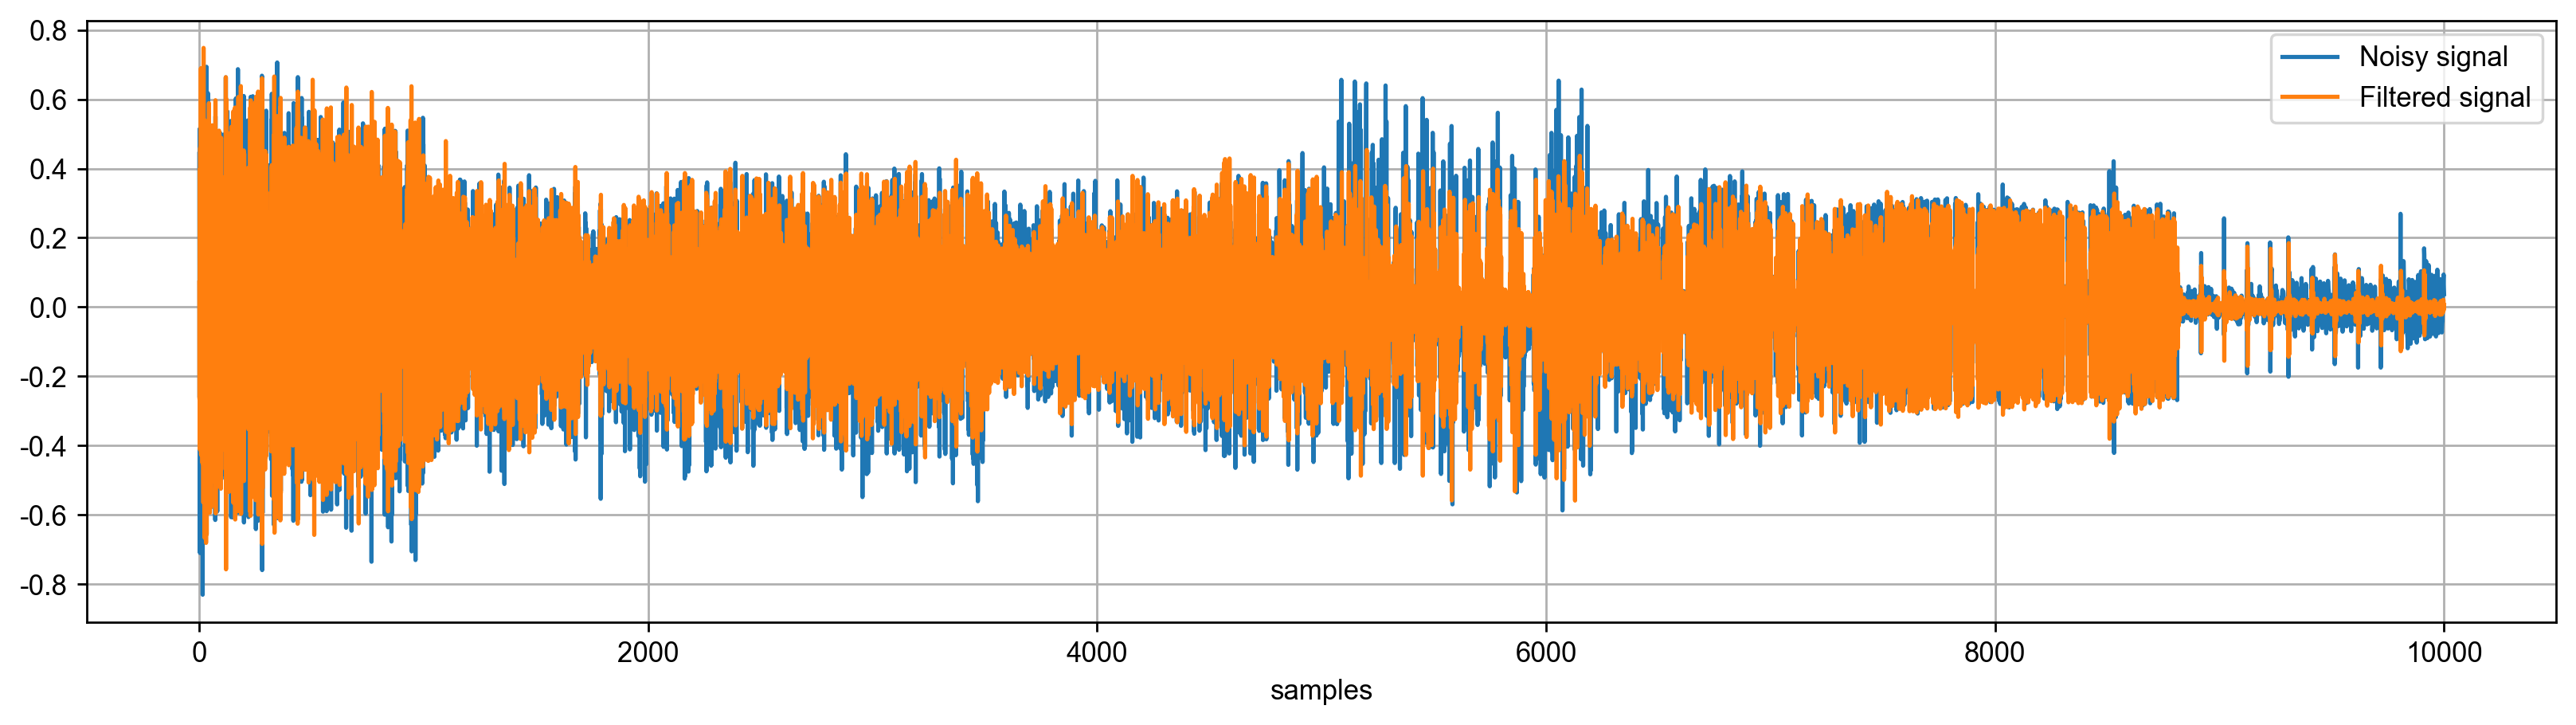

In [6]:
# read raw data
t = np.linspace(1, len(df['x']),len(df['x']))
x = df['x']
y = df['y']
z = df['z']
plt.plot(t, x, label='Noisy signal')

#applying butterworth bandpass filter
x_filtered = butter_bandpass_filter(x, lowcut, highcut, fs, order=4)
y_filtered = butter_bandpass_filter(y, lowcut, highcut, fs, order=4)
z_filtered = butter_bandpass_filter(z, lowcut, highcut, fs, order=4)
plt.plot(t, x_filtered, label='Filtered signal')

plt.grid(True)
plt.axis('tight')
plt.xlabel('samples')
plt.legend(loc='upper right')
plt.show()

In [7]:
x_new = x_filtered.reshape(10000,1)
y_new = y_filtered.reshape(10000,1)
z_new = z_filtered.reshape(10000,1)
model = df['model'].values.reshape(10000,1)
label = df['label'].values.reshape(10000,1)

#put all the filtered data along with labels into one pandas DataFrame
filtered = np.hstack((x_new,y_new,z_new,label,model))

In [8]:
df_filtered = pd.DataFrame(filtered)

In [9]:
#save to a new .csv file
df_filtered.to_csv('fossil1_filtered.csv',index=0,header = ['x','y','z','label','model'])